# お弁当の需要予想

In [103]:
import pandas as pd
import numpy as np


### データセットの読み込み

In [104]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample.csv",header=None)
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

# 2014-05 以前のデータを除く
train.index = pd.to_datetime(train["datetime"])
train = train["2014-05-01":]
train = train.reset_index(drop=True)

train.head()

Data Shapes
Train: (207, 12) Test: (40, 11) Sample: (40, 2)


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-5-1,64,木,0,マーボ茄子,415.0,NaN,NaN,NaN,晴れ,--,24.0
1,2014-5-2,47,金,0,鶏の天ぷら,420.0,NaN,NaN,NaN,晴れ,--,23.3
2,2014-5-7,88,水,1,肉じゃが,415.0,NaN,NaN,NaN,晴れ,--,18.9
3,2014-5-8,59,木,0,メンチカツ,405.0,NaN,NaN,NaN,薄曇,--,21.0
4,2014-5-9,58,金,1,手作りチキンカツ,434.0,NaN,NaN,1.0,晴れ,--,23.4


### データフレームで中身を検証

In [105]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-5-1,64,木,0,マーボ茄子,415.0,NaN,NaN,NaN,晴れ,--,24.0
1,2014-5-2,47,金,0,鶏の天ぷら,420.0,NaN,NaN,NaN,晴れ,--,23.3
2,2014-5-7,88,水,1,肉じゃが,415.0,NaN,NaN,NaN,晴れ,--,18.9
3,2014-5-8,59,木,0,メンチカツ,405.0,NaN,NaN,NaN,薄曇,--,21.0
4,2014-5-9,58,金,1,手作りチキンカツ,434.0,NaN,NaN,1.0,晴れ,--,23.4


### Nanを0に置換

In [106]:
train = train.fillna(0)
test = test.fillna(0)
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-5-1,64,木,0,マーボ茄子,415.0,0,0,0.0,晴れ,--,24.0
1,2014-5-2,47,金,0,鶏の天ぷら,420.0,0,0,0.0,晴れ,--,23.3
2,2014-5-7,88,水,1,肉じゃが,415.0,0,0,0.0,晴れ,--,18.9
3,2014-5-8,59,木,0,メンチカツ,405.0,0,0,0.0,薄曇,--,21.0
4,2014-5-9,58,金,1,手作りチキンカツ,434.0,0,0,1.0,晴れ,--,23.4


In [107]:
import re

#お楽しみメニューがある場合は、fun=1
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
test["fun"] = test["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
#カレーがある場合は、curry=1
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
test["curry"] = test["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
#かつがある場合は、katsu=1
train["katsu"] = train["name"].apply(lambda x : 1 if re.search("カツ|かつ", x) != None else 0)
test["katsu"] = test["name"].apply(lambda x : 1 if re.search("カツ|かつ", x) != None else 0)
#フライ
train["fried"] = train["name"].apply(lambda x : 1 if re.search("フライ", x) != None else 0)
test["fried"] = test["name"].apply(lambda x : 1 if re.search("フライ", x) != None else 0)
#ハンバーグ
train["hamburg"] = train["name"].apply(lambda x : 1 if re.search("ハンバーグ", x) != None else 0)
test["hamburg"] = test["name"].apply(lambda x : 1 if re.search("ハンバーグ", x) != None else 0)
#唐揚げ
train["karaage"] = train["name"].apply(lambda x : 1 if re.search("唐揚", x) != None else 0)
test["karaage"] = test["name"].apply(lambda x : 1 if re.search("唐揚", x) != None else 0)
#チキン
train["chicken"] = train["name"].apply(lambda x : 1 if re.search("鶏|チキン", x) != None else 0)
test["chicken"] = test["name"].apply(lambda x : 1 if re.search("鶏|チキン", x) != None else 0)
#ポーク
train["pork"] = train["name"].apply(lambda x : 1 if re.search("豚|ポーク", x) != None else 0)
test["pork"] = test["name"].apply(lambda x : 1 if re.search("豚|ポーク", x) != None else 0)
#ビーフ
train["beef"] = train["name"].apply(lambda x : 1 if re.search("牛|ビーフ", x) != None else 0)
test["beef"] = test["name"].apply(lambda x : 1 if re.search("牛|ビーフ", x) != None else 0)
#魚
train["fish"] = train["name"].apply(lambda x : 1 if re.search("魚|サバ|カレイ|さんま|さわら|メダイ|キス|ます|サーモン|カジキ|ぶり", x) != None else 0)
test["fish"] = test["name"].apply(lambda x : 1 if re.search("魚|サバ|カレイ|さんま|さわら|メダイ|キス|ます|サーモン|カジキ|ぶり", x) != None else 0)

#月データのみを抽出
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))
test["month"] = test["datetime"].apply(lambda x : int(x.split("-")[1]))


In [108]:
train = train.drop(columns=["datetime","name","kcal","remarks"])
test = test.drop(columns=["datetime","name","kcal","remarks"])
train.head(20)

,y,week,soldout,event,payday,weather,precipitation,temperature,fun,curry,katsu,fried,hamburg,karaage,chicken,pork,beef,fish,month
0,64,木,0,0,0.0,晴れ,--,24.0,0,0,0,0,0,0,0,0,0,0,5
1,47,金,0,0,0.0,晴れ,--,23.3,0,0,0,0,0,0,1,0,0,0,5
2,88,水,1,0,0.0,晴れ,--,18.9,0,0,0,0,0,0,0,0,0,0,5
3,59,木,0,0,0.0,薄曇,--,21.0,0,0,1,0,0,0,0,0,0,0,5
4,58,金,1,0,1.0,晴れ,--,23.4,0,0,1,0,0,0,1,0,0,0,5
5,73,月,0,0,0.0,薄曇,--,22.7,0,0,0,0,1,0,0,0,0,0,5
6,70,火,1,0,0.0,雨,0,18.6,0,0,0,0,0,1,0,0,0,1,5
7,64,水,1,0,0.0,薄曇,--,26.0,0,0,1,0,0,0,0,0,0,0,5
8,58,木,1,0,0.0,曇,--,19.3,0,0,0,0,0,0,1,0,0,0,5
9,126,金,0,ママの会,0.0,快晴,--,23.8,1,1,0,0,0,0,0,1,0,0,5


### 降水量の操作

In [109]:
train.loc[train["precipitation"] == "--","precipitation"] = 0
test.loc[test["precipitation"] == "--","precipitation"] = 0
train["precipitation"] = train['precipitation'].astype(np.float64)
test["precipitation"] = test['precipitation'].astype(np.float64)
train.head()

,y,week,soldout,event,payday,weather,precipitation,temperature,fun,curry,katsu,fried,hamburg,karaage,chicken,pork,beef,fish,month
0,64,木,0,0,0.0,晴れ,0.0,24.0,0,0,0,0,0,0,0,0,0,0,5
1,47,金,0,0,0.0,晴れ,0.0,23.3,0,0,0,0,0,0,1,0,0,0,5
2,88,水,1,0,0.0,晴れ,0.0,18.9,0,0,0,0,0,0,0,0,0,0,5
3,59,木,0,0,0.0,薄曇,0.0,21.0,0,0,1,0,0,0,0,0,0,0,5
4,58,金,1,0,1.0,晴れ,0.0,23.4,0,0,1,0,0,0,1,0,0,0,5


### ONE-HOTデータに変更

In [110]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
#testデータにないカラムを補足
test["weather_雷電"] = 0
train.head()    

,y,soldout,payday,precipitation,temperature,fun,curry,katsu,fried,hamburg,...,week_金,event_0,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雷電
0,64,0,0.0,0.0,24.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,47,0,0.0,0.0,23.3,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2,88,1,0.0,0.0,18.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,59,0,0.0,0.0,21.0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,58,1,1.0,0.0,23.4,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


### 販売数の取り出し

In [111]:
y = train["y"]
print(y)

0      64
1      47
2      88
3      59
4      58
       ..
96     59
97     50
98     45
99     56
100    40
Name: y, Length: 101, dtype: int64


### トレーニングデータから販売数を削除

In [112]:
train = train.drop(columns=["y"])
train.head()
test.head()

,soldout,payday,precipitation,temperature,fun,curry,katsu,fried,hamburg,karaage,...,week_金,event_0,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雷電
0,1,0.0,0.0,20.2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0.0,0.0,23.9,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0.0,0.0,28.7,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,1,0.0,0.5,21.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0.0,0.0,22.1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [113]:
train.head()

,soldout,payday,precipitation,temperature,fun,curry,katsu,fried,hamburg,karaage,...,week_金,event_0,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雷電
0,0,0.0,0.0,24.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0.0,0.0,23.3,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2,1,0.0,0.0,18.9,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0.0,0.0,21.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,1.0,0.0,23.4,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0


### 配列に変換

In [114]:
train_data = train.values
train_labels = y.values
test_data = test.values


In [115]:
print(train_data.shape)
print(test_data.shape)

(101, 29)
(40, 29)


### 特徴を正規化する（特徴の平均を減算して標準偏差で除算）

In [116]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


### モデルを作成する

In [117]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mae'])

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


### 学習する

In [119]:
from tensorflow import keras

# 完了したエポックごとに1つのドットを印刷して、トレーニングの進捗状況を表示する
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# 学習データ(train_data)のうち、20％が検証データ（validation）として使用される
history = model.fit(train_data, 
                    train_labels,
                    batch_size=1,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[early_stop, PrintDot()]) 

Train on 80 samples, validate on 21 samples
Epoch 1/200
80/80 [==============================] - 0s 4ms/step - loss: 4320.2261 - mae: 63.1879 - val_loss: 2484.6670 - val_mae: 47.2140

.Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 2450.1031 - mae: 46.4394 - val_loss: 801.4332 - val_mae: 25.0558
.Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 342.9211 - mae: 13.2351 - val_loss: 161.7282 - val_mae: 10.5877
.Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 116.3051 - mae: 8.2943 - val_loss: 138.9499 - val_mae: 9.9213
.Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 76.7249 - mae: 6.7691 - val_loss: 122.3106 - val_mae: 9.0225
.Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 61.2517 - mae: 5.8015 - val_loss: 118.4311 - val_mae: 8.6875
.Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 49.0257 - mae: 5.1227 - val_loss: 117.8150 - val_mae: 8.590

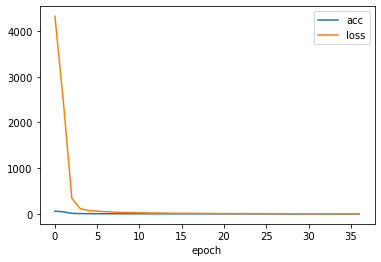

In [120]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history["mae"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend()

### 誤差を調査する

In [121]:
score = model.evaluate(train_data, train_labels, verbose=0)
print()
print("Testing set Mean Abs Error: {:7.2f}".format( score[1]))


Testing set Mean Abs Error:    2.41


In [122]:
train_labels

array([ 64,  47,  88,  59,  58,  73,  70,  64,  58, 126,  70,  71, 104,
        54,  65,  77,  79,  74,  64, 119,  74,  59,  47,  64,  93,  74,
        56,  50,  72, 121,  76,  63,  66,  56,  57,  72,  61,  64,  49,
        74,  65,  54,  50,  53,  63,  82,  56,  54,  48, 124,  65,  51,
        53,  53,  55,  53,  56,  62,  83,  65,  52,  58,  60,  38,  75,
        54,  58,  63, 129,  45,  40,  56,  53,  56,  54, 100,  55,  68,
        62,  56,  39,  65,  68,  53,  54,  43,  68,  63,  54,  53, 115,
        56,  49,  46,  45,  29,  59,  50,  45,  56,  40], dtype=int64)

In [123]:
train_predictions = model.predict(train_data).flatten() 
myArray = np.array(train_predictions)
myArray = myArray.astype(int)
myArray

array([ 64,  48,  87,  59,  59,  74,  70,  64,  61, 127,  76,  70, 104,
        55,  65,  76,  78,  75,  64, 118,  72,  61,  47,  67,  93,  74,
        56,  54,  67, 120,  75,  62,  65,  56,  53,  70,  61,  64,  49,
        72,  66,  54,  50,  52,  62,  82,  54,  54,  48, 123,  65,  52,
        53,  54,  54,  54,  57,  62,  85,  66,  51,  58,  62,  38,  75,
        55,  58,  61, 128,  45,  40,  56,  53,  55,  58,  98,  55,  67,
        62,  56,  48,  69,  48,  48,  52,  55,  63,  56,  41,  53, 117,
        43,  42,  50,  43,  59,  54,  50,  43,  48,  42])

### 検査データで予測する

In [124]:
test_predictions = model.predict(test_data).flatten() 
myArray = np.array(test_predictions)
myArray = myArray.astype(int)
myArray

array([ 62,  46,  50,  57,  47,  76,  51, 119,  39,  57,  55,  49,  54,
        49,  59,  61,  61,  58,  39,  36,  53,  55,  48,  74,  52, 113,
        40,  55,  52,  44,  47,  64,  41,  41,  62,  75,  57,  63,  43,
        54])

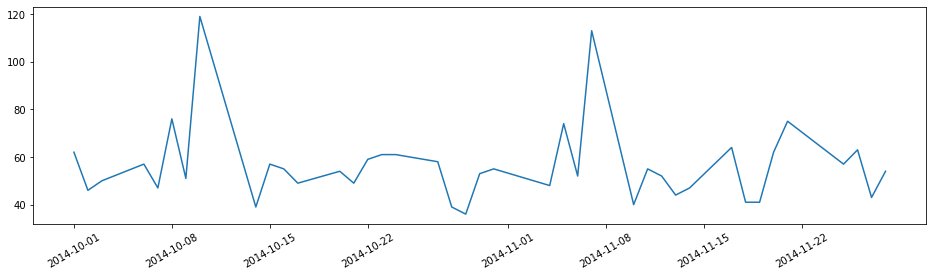

In [125]:
# テストデータの予測結果をグラフで確認
plt.figure(figsize=(16, 4))
plt.plot(pd.to_datetime(sample[0]), myArray)
plt.xticks(rotation=30)     #横軸目盛りを30度傾ける
plt.show()

### サンプルデータから出力データを作成

In [126]:
sample.shape

(40, 2)

In [127]:
myArray = np.array(test_predictions)
myArray = myArray.astype(int)
sample['y'] = myArray
s = sample.drop(1, axis=1)
s

,0,y
0,2014-10-1,62
1,2014-10-2,46
2,2014-10-3,50
3,2014-10-6,57
4,2014-10-7,47
5,2014-10-8,76
6,2014-10-9,51
7,2014-10-10,119
8,2014-10-14,39
9,2014-10-15,57


### CSVファイル出力

In [128]:
import csv
f = open('out.csv','w',newline='')
writer = csv.writer(f)
writer.writerows(s.values)
f.close()